    Order ID      Date        Product     Category  Price  Quantity  \
0    ORD0001  14-03-25  Running Shoes     Footwear     60         3   
1    ORD0002  20-03-25     Headphones  Electronics    100         4   
2    ORD0003  15-02-25  Running Shoes     Footwear     60         2   
3    ORD0004  19-02-25  Running Shoes     Footwear     60         3   
4    ORD0005  10-03-25     Smartwatch  Electronics    150         3   
..       ...       ...            ...          ...    ...       ...   
245  ORD0246  17-03-25        T-Shirt     Clothing     20         2   
246  ORD0247  30-03-25          Jeans     Clothing     40         1   
247  ORD0248  05-03-25        T-Shirt     Clothing     20         2   
248  ORD0249  08-03-25     Smartwatch  Electronics    150         3   
249  ORD0250  19-02-25     Smartphone  Electronics    500         4   

     Total Sales  Customer Name Customer Location Payment Method     Status  
0            180     Emma Clark          New York     Debit Card  Can

C:\Users\igor_\AppData\Local\Temp\ipykernel_9556\3697673831.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dados['Date'] = pd.to_datetime(dados['Date'])


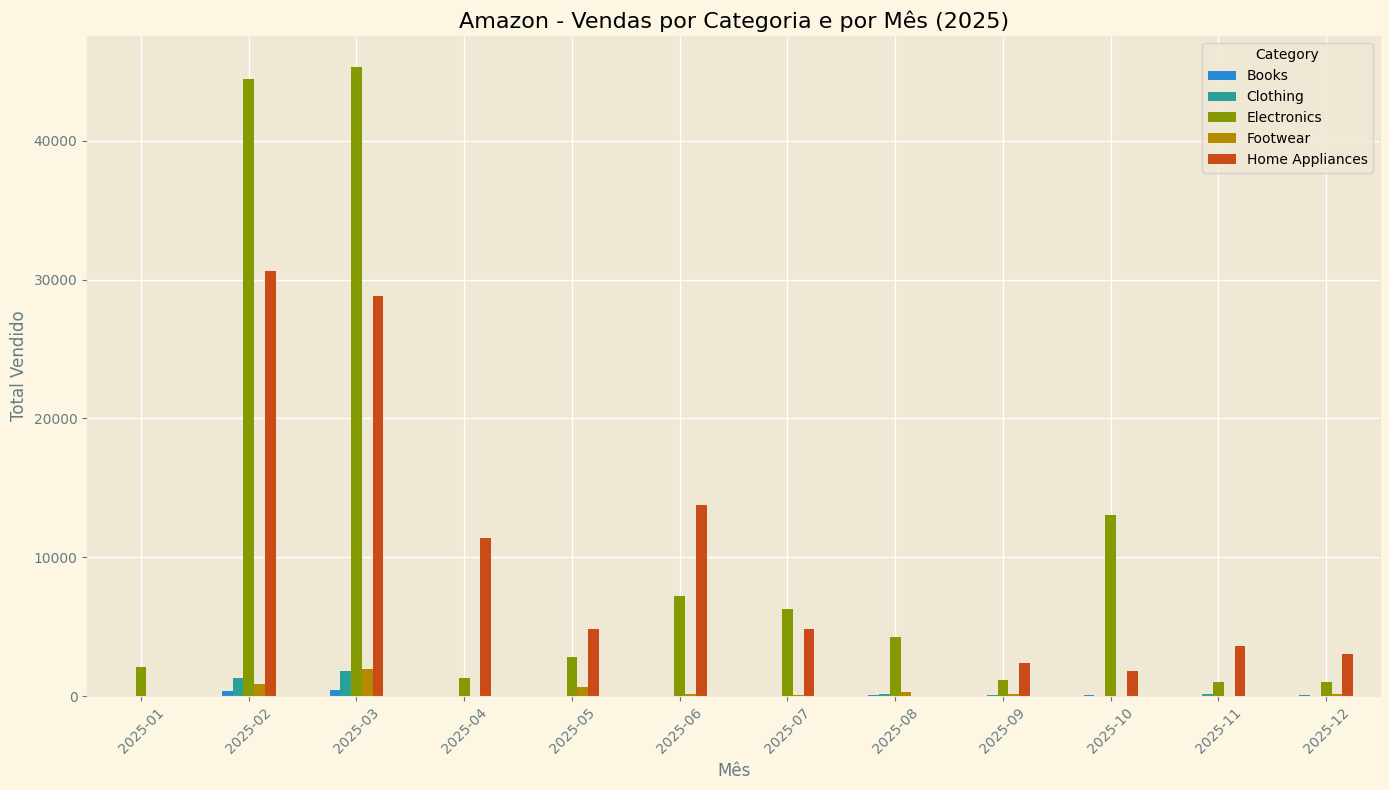

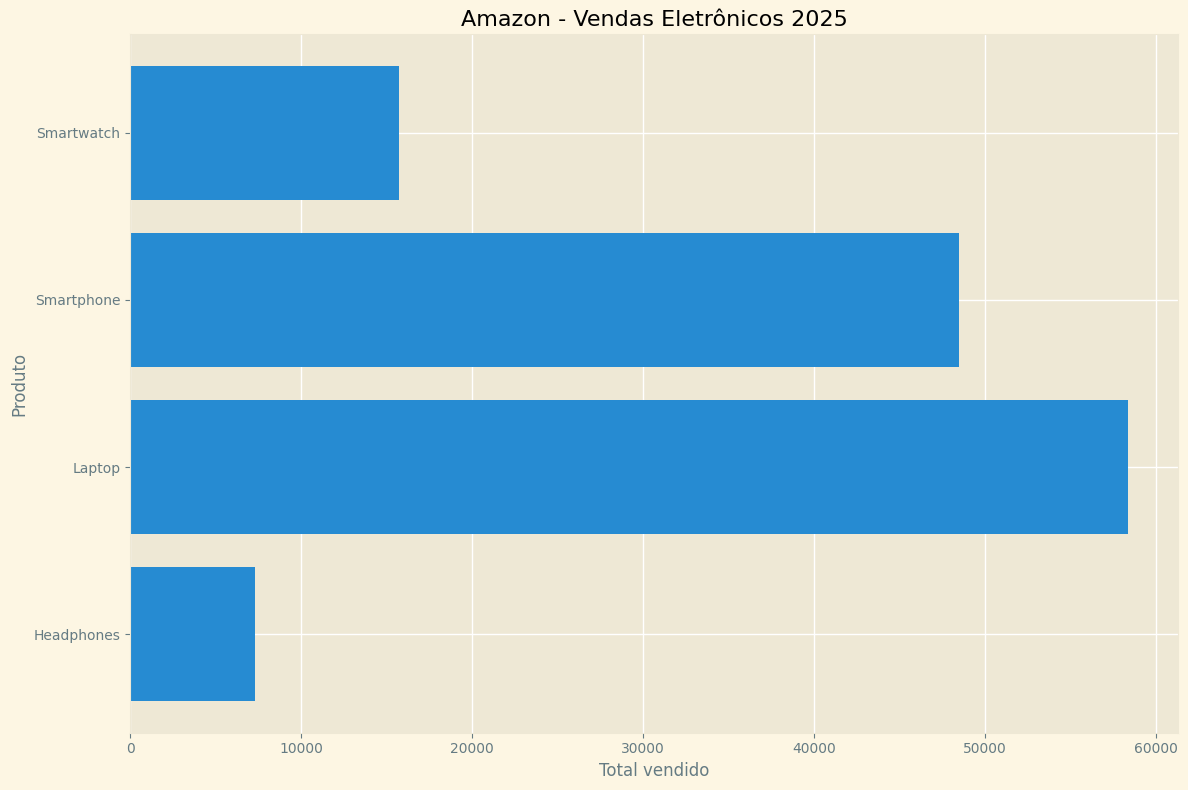

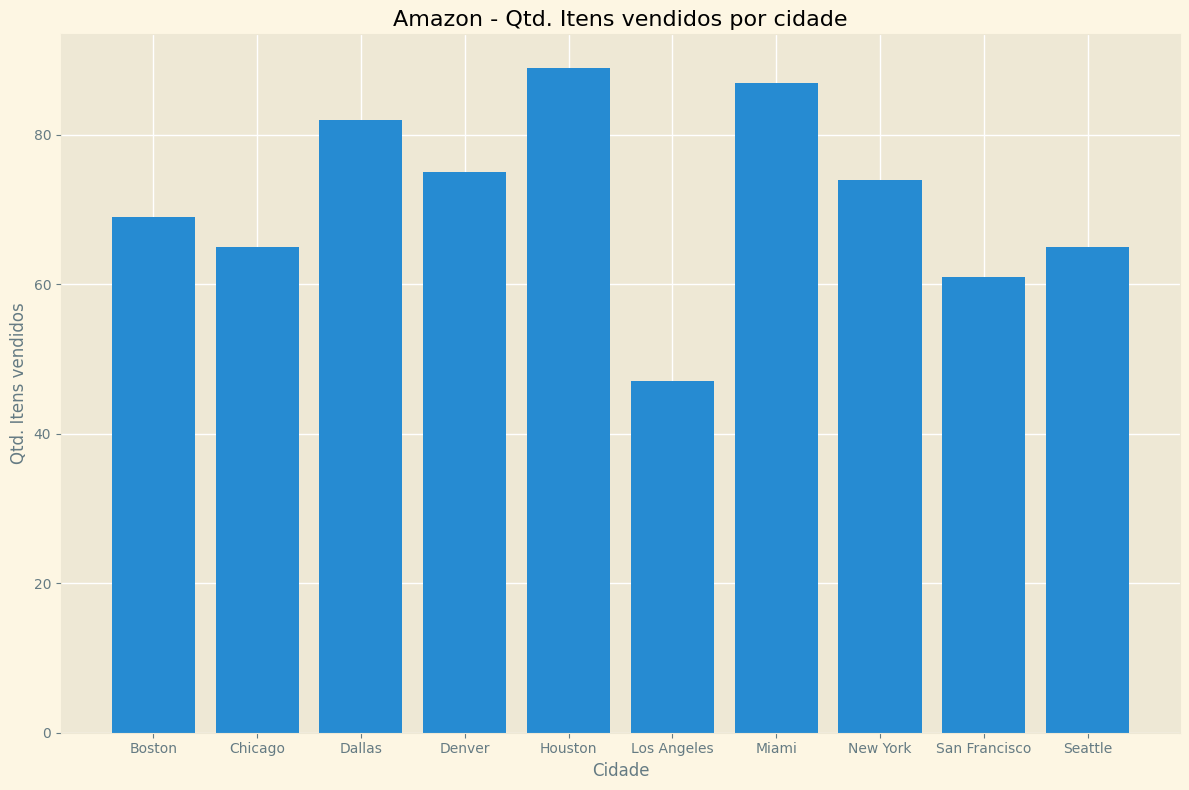

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

dados = pd.read_csv(r'C:\Users\igor_\Desktop\Python\Amazon_Sales\archive\amazon_sales_data 2025.csv')
print(dados)


#------------------------------------------
# FIGURA 1 : Total de vendas mensais por categoria mostrando forte sazonalidade

dados['Date'] = pd.to_datetime(dados['Date'])
dados['Mes'] = dados['Date'].dt.to_period('M').astype(str)
grupo_cat_mes = dados.groupby(['Mes', 'Category'])['Total Sales'].sum().reset_index()
tabela = grupo_cat_mes.pivot(index='Mes', columns='Category', values='Total Sales')

plt.style.use('Solarize_Light2')
tabela.plot(kind='bar', figsize=(14,8))

plt.title('Amazon - Vendas por Categoria e por Mês (2025)')
plt.xlabel('Mês')
plt.ylabel('Total Vendido')
plt.xticks(rotation=45)
plt.grid(color='white')
plt.tight_layout()

plt.show()

#------------------------------------------
# FIGURA 2: Total venda de produtos eletronicos

dados_eletronic = dados[dados['Category'] == 'Electronics']
grupo_product_eletronic = dados_eletronic.groupby('Product')['Total Sales'].sum().reset_index()

plt.style.use('Solarize_Light2')
plt.figure(figsize=(12, 8))
plt.barh(grupo_product_eletronic['Product'], grupo_product_eletronic['Total Sales'])
plt.title('Amazon - Vendas Eletrônicos 2025')
plt.xlabel('Total vendido')     
plt.ylabel('Produto')      
plt.grid(color='white')
plt.tight_layout()

plt.show()

#------------------------------------------
# FIGURA 3: Quantidade de produtos vendidos por cidade

grupo_cidades = dados.groupby('Customer Location')['Quantity'].sum().reset_index()
plt.style.use('Solarize_Light2')
plt.figure(figsize=(12, 8))
plt.bar(grupo_cidades['Customer Location'], grupo_cidades['Quantity'])

plt.title('Amazon - Qtd. Itens vendidos por cidade')
plt.xlabel('Cidade')     
plt.ylabel('Qtd. Itens vendidos')      
plt.grid(color='white')
plt.tight_layout()

plt.show()